# Exercício 1: ARIMA & SARIMA
Análise de série temporal com ARIMA e SARIMA para o dataset 22739, incluindo frequência e renderização completa de summary.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from IPython.display import HTML, display
%matplotlib inline

In [2]:
# 1) Leitura e limpeza
df = pd.read_csv('../data/raw/bcdata.sgs.22739.csv', sep=';')
df.columns = ['data', 'valor']
df['data'] = pd.to_datetime(df['data'], dayfirst=True)
df['valor'] = df['valor'].str.replace(' ', '').str.replace(',', '.', regex=False).astype(float)
df.set_index('data', inplace=True)

# 2) Forçar frequência mensal
df = df.asfreq('MS')
df.head()

,valor
data,
1995-01-01,104.1
1995-02-01,89.2
1995-03-01,196.1
1995-04-01,164.7
1995-05-01,226.2


count    364.000000
mean     263.871978
std      100.485945
min       85.000000
25%      178.300000
50%      255.400000
75%      352.025000
max      517.900000
Name: valor, dtype: float64


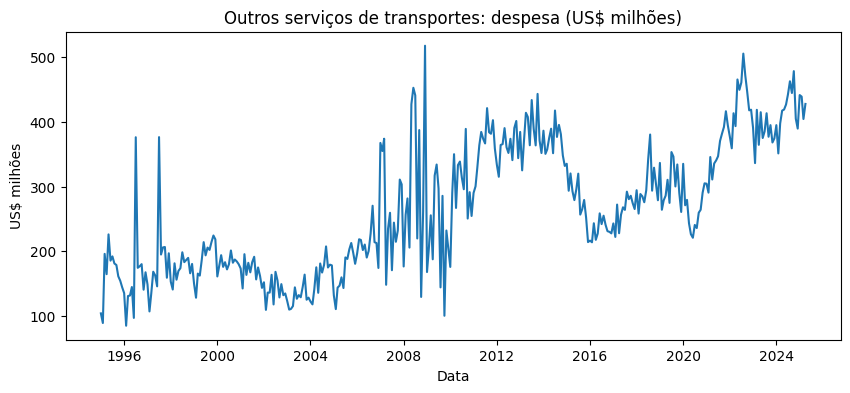

In [3]:
# Estatísticas descritivas e plot da série
print(df['valor'].describe())
plt.figure(figsize=(10,4))
plt.plot(df.index, df['valor'])
plt.title('Outros serviços de transportes: despesa (US$ milhões)')
plt.xlabel('Data')
plt.ylabel('US$ milhões')
plt.show()

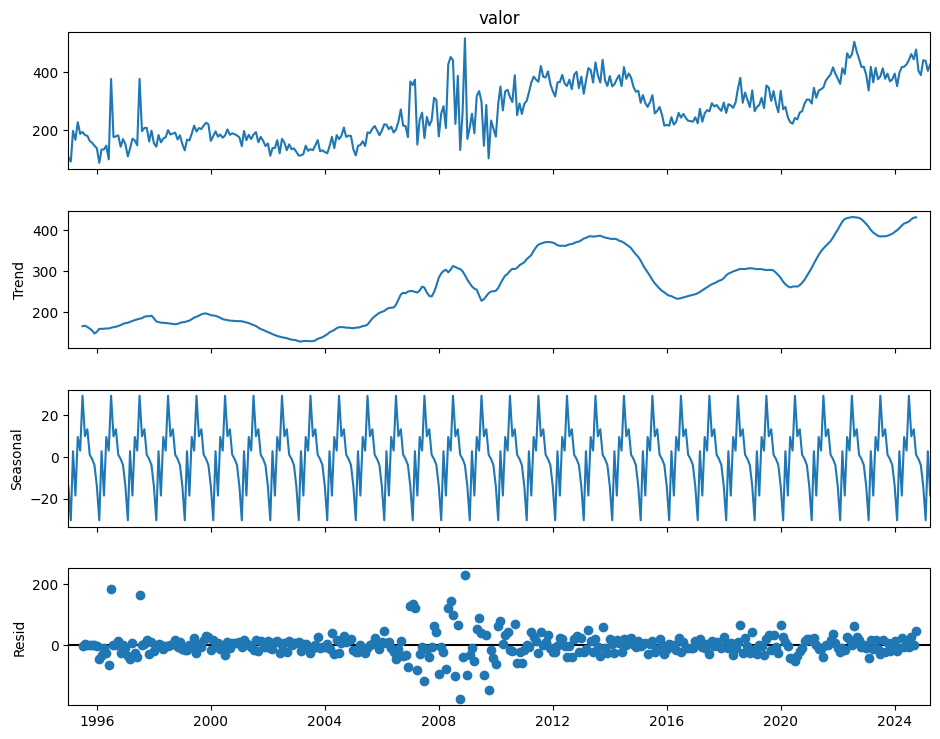

In [4]:
# Decomposição
decomp = seasonal_decompose(df['valor'], model='additive', period=12)
fig = decomp.plot()
fig.set_size_inches(10,8)
plt.show()

In [5]:
# Teste de estacionariedade ADF
result = adfuller(df['valor'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])

ADF Statistic: -1.3650918258811644
p-value: 0.5988924633893183


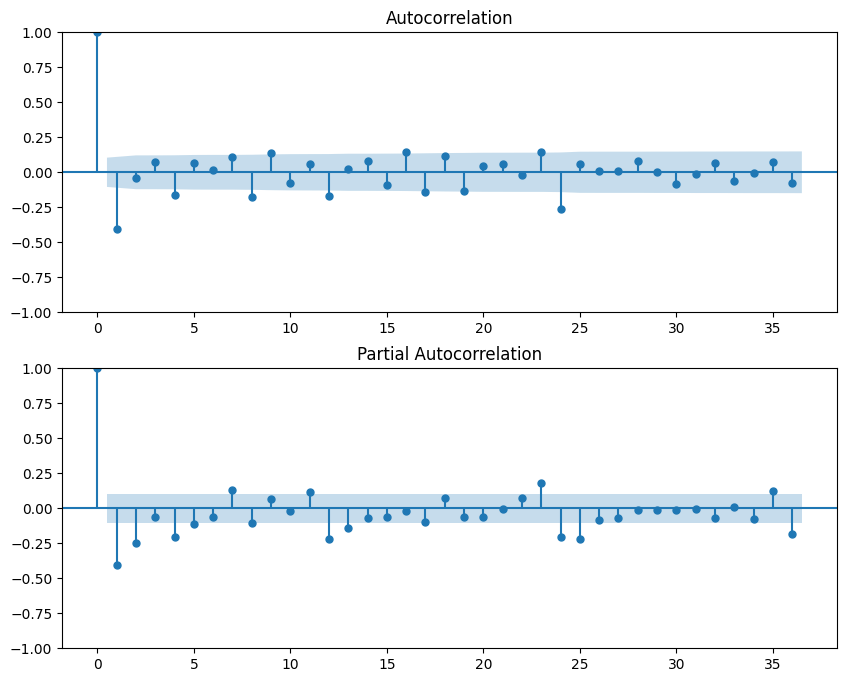

In [6]:
# Diferenciações e ACF/PACF
diff = df['valor'].diff().dropna()
diff_seasonal = diff.diff(12).dropna()
fig, axes = plt.subplots(2,1, figsize=(10,8))
plot_acf(diff_seasonal, lags=36, ax=axes[0])
plot_pacf(diff_seasonal, lags=36, ax=axes[1])
plt.show()

In [7]:
# Ajuste ARIMA (1,1,1) com renderização completa do summary
model_arima = ARIMA(df['valor'], order=(1,1,1)).fit()
display(HTML(model_arima.summary().as_html()))

In [8]:
# Ajuste SARIMA (1,1,1)(1,1,1,12)
model_sarima = SARIMAX(df['valor'], order=(1,1,1), seasonal_order=(1,1,1,12)).fit(disp=False)
display(HTML(model_sarima.summary().as_html()))

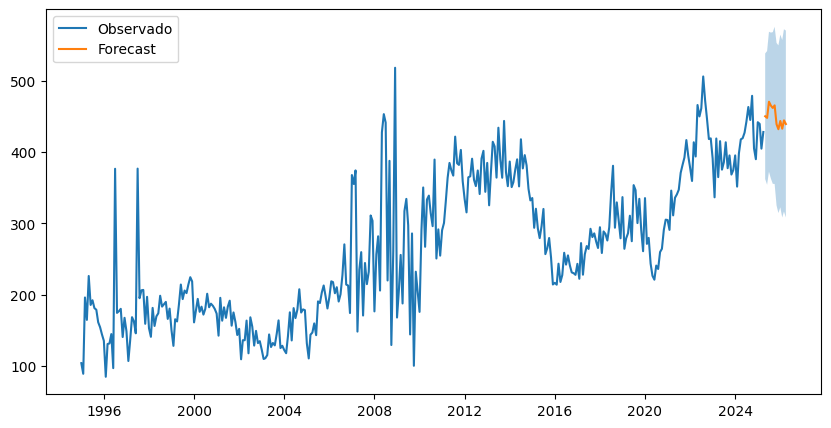

In [9]:
# Forecast 12 meses
forecast = model_sarima.get_forecast(12)
fmean = forecast.predicted_mean
ci = forecast.conf_int()
plt.figure(figsize=(10,5))
plt.plot(df.index, df['valor'], label='Observado')
plt.plot(fmean.index, fmean, label='Forecast')
plt.fill_between(ci.index, ci.iloc[:,0], ci.iloc[:,1], alpha=0.3)
plt.legend()
plt.show()